In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from kneed import KneeLocator
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

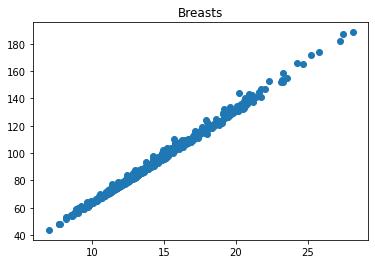

In [4]:
data = pd.read_csv("data.csv")
Tset = np.array(data[["Radius_mean", "perimeter_mean"]])
X = Tset[:, 0]
y = Tset[:, 1]
plt.title("Breasts")
plt.scatter(x=X, y=y)

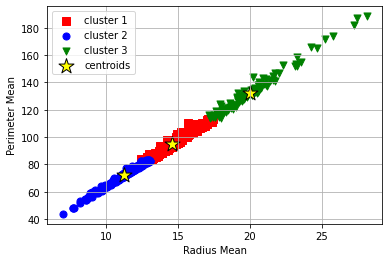

In [9]:
#training K-means clustering
km = KMeans(n_clusters=3, init = "random", n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(Tset)

plt.scatter(Tset[y_km == 0, 0], Tset[y_km == 0, 1], s=50, c='red', marker='s', label='cluster 1')

plt.scatter(Tset[y_km == 1, 0], Tset[y_km == 1, 1], s=50, c='blue', marker='o', label='cluster 2')

plt.scatter(Tset[y_km == 2, 0], Tset[y_km == 2, 1], s=50, c='green', marker='v', label='cluster 3')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='yellow', edgecolor='black', label='centroids')

plt.legend(scatterpoints=1)
plt.xlabel("Radius Mean")
plt.ylabel("Perimeter Mean")
plt.grid()
plt.show()

In [6]:
#calculate the distortions
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(Tset)
    distortions.append(km.inertia_)

print(distortions)


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[342424.13900193665, 107063.64011655198, 58531.30967902408, 39309.90943636064, 24893.307418290668, 16844.21302529022, 12119.790263619456, 9934.805295644055, 8388.694585571282, 7409.298992551171]


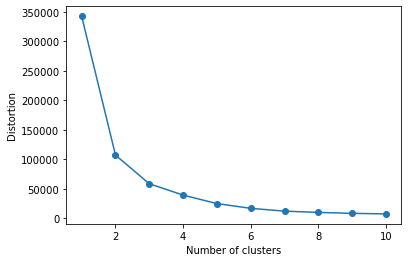

In [11]:

kl = KneeLocator(range(1, 11), distortions, curve="convex", direction="decreasing")
kl.elbow

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()
